In [15]:
# Load used libraries
library(dplyr)
library(tidyverse)
library(RColorBrewer)
library(patchwork)
library(car)
library(ggpubr)
library(rstatix)
library(xtable)
library(comprehenr)
setwd('d:\\microbial_network\\microbial_network_explore')

Warning message:
"程辑包'comprehenr'是用R版本4.2.3 来建造的"


In [6]:
# Read data
result <- read.csv("data\\temp_results\\simulation_results.csv")

In [11]:
result_absolute <- result %>%
  filter(abs_rel == 'Absolute') %>%
  {.}
result_relative <- result %>%
  filter(abs_rel == 'Relative') %>%
  {.}
head(result_absolute)

,Method,run,average_precision_score,roc_auc_score,abs_rel
,<chr>,<int>,<dbl>,<dbl>,<chr>
1,Pearson,0,0.2096265,0.3914286,Absolute
2,Precision Matrix,0,0.2037431,0.4085714,Absolute
3,cLV,0,0.2007044,0.4506173,Absolute
4,gLV,0,0.4364256,0.5857143,Absolute
5,Partial Correlation,0,0.4763446,0.6342857,Absolute
6,SparCC,0,0.2826851,0.3857143,Absolute


In [18]:
methods = unique(result$Method)
my_comparisons = to_list(for (method in methods) if (method != 'Baseline') c(method, 'Baseline'))

In [19]:
my_comparisons

[[1]]
[1] "Pearson"  "Baseline"

[[2]]
[1] "Precision Matrix" "Baseline"        

[[3]]
[1] "cLV"      "Baseline"

[[4]]
[1] "gLV"      "Baseline"

[[5]]
[1] "Partial Correlation" "Baseline"           

[[6]]
[1] "SparCC"   "Baseline"

[[7]]
[1] "SpiecEasi" "Baseline"

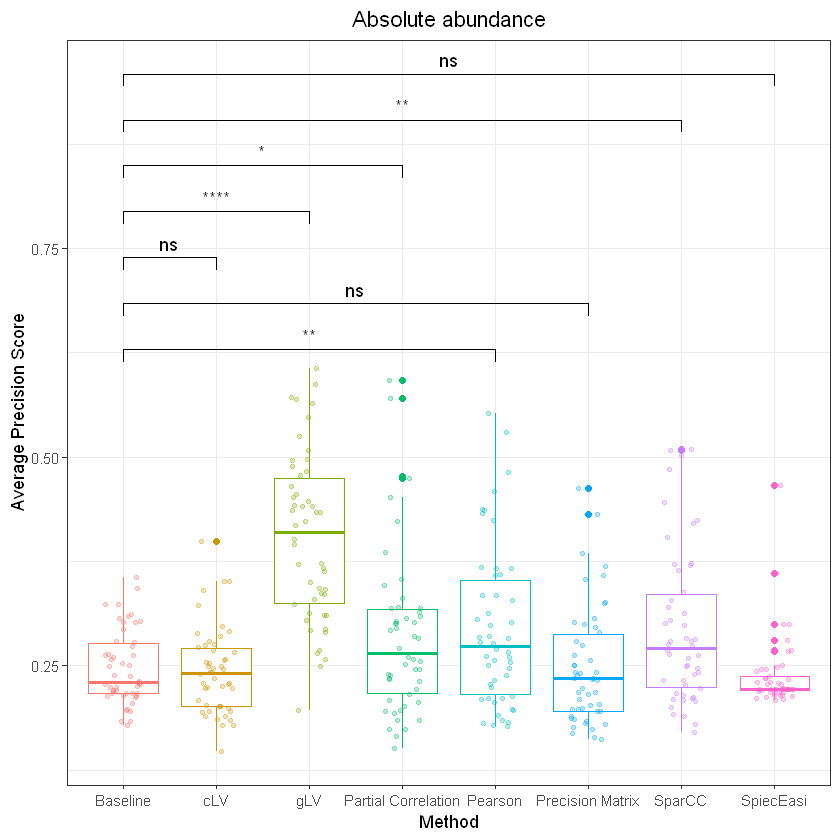

In [37]:
blind_colors <- c("#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7", "#000000")
ggplot(data = result_absolute, aes(x = Method, y=average_precision_score, color = Method, )) +
  geom_boxplot() +
  geom_jitter(width = 0.2, size = 1, alpha = 0.3) +
  scale_fill_brewer(palette = "Set1") +
    # scale_color_manual(values = blind_colors) +
  theme_bw() +
  theme(legend.position = "none") +
  labs(x = "Method", y = "Average Precision Score") +
  ggtitle("Absolute abundance") +
  stat_compare_means(comparisons = my_comparisons, label = "p.signif", method = 't.test') +
  theme(plot.title = element_text(hjust = 0.5))
ggsave(filename = "figures\\pr_absolute_abundance.pdf",
 width = 20, height = 20, units = "cm")

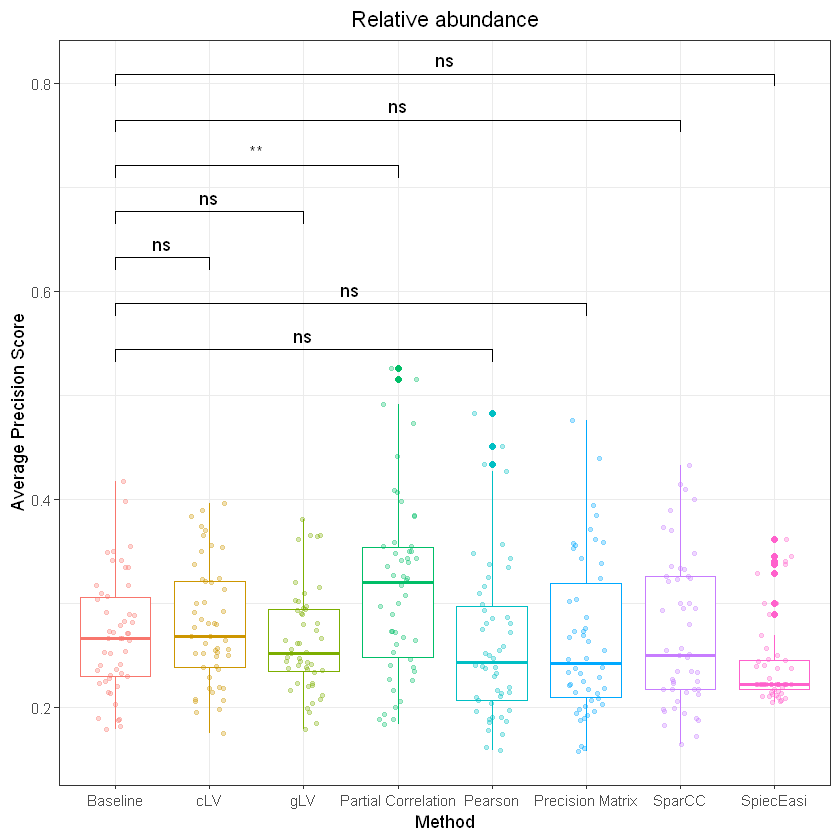

In [38]:
ggplot(data = result_relative, aes(x = Method, y=average_precision_score, color = Method, )) +
  geom_boxplot() +
  geom_jitter(width = 0.2, size = 1, alpha = 0.3) +
  scale_fill_brewer(palette = "Set1") +
    # scale_color_manual(values = blind_colors) +
  theme_bw() +
  theme(legend.position = "none") +
  labs(x = "Method", y = "Average Precision Score") +
  ggtitle("Relative abundance") +
  stat_compare_means(comparisons = my_comparisons, label = "p.signif", method = 't.test', method.args = list(alternative = 'greater')) +
  theme(plot.title = element_text(hjust = 0.5))
ggsave(filename = "figures\\pr_relative_abundance.pdf",
 width = 20, height = 20, units = "cm")